<a href="https://colab.research.google.com/github/MaxEV2003/Concentraci-n/blob/main/Valores%20Atipicos/Actividad%203.3.2/Act3_3_2_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.3.2: Limpieza de Base de Datos (Airbnb - México)

## Generación y Análisis Inicial del Frame

In [ ]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar un archivo
from google.colab import files
files.upload()

In [ ]:
#Ajustar el maximo de columnas
pd.options.display.max_columns = None

In [ ]:
#Ajustar el maximo de filas
pd.options.display.max_rows = None

In [ ]:
#Crear DataFrame
data = pd.read_csv('listings.csv',encoding='utf-8')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico","I'm Marco. I am a graphic designer, but I also...",within an hour,100%,88%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Roma Norte,3,6,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Cuauhtémoc,NaN,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...","$1,652.00",3,48,3,3,48,48,3.0,48.0,NaN,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,NaN,f,3,2,1,0,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,NaN,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...","$3,663.00",1,7,1,1,7,7,1.0,7.0,NaN,t,28,58,88,363,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100%,92%,t,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,17,17,"['email', 'phone', 'work_email']",t,t,NaN,Cuauhtémoc,NaN,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...","$18,000.00",1,365,1,1,365,365,1.0,365.0,NaN,t,29,59,89,364,2024-06-28,64,0,0,2011-11-09,2023-03-26,4.58,4.56,4.70,4.87,4.78,4.98,4.48,NaN,f,13,4,2,0,0.42
3,913084,https://www.airbnb.com/rooms/913084,20240627045222,2024-06-28,ci

In [ ]:
#Cantidad de filas y columnas del frame
data.shape

(26536, 75)

In [ ]:
#Informacion del frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26536 non-null  int64  
 1   listing_url                                   26536 non-null  object 
 2   scrape_id                                     26536 non-null  int64  
 3   last_scraped                                  26536 non-null  object 
 4   source                                        26536 non-null  object 
 5   name                                          26536 non-null  object 
 6   description                                   25585 non-null  object 
 7   neighborhood_overview                         16246 non-null  object 
 8   picture_url                                   26536 non-null  object 
 9   host_id                                       26536 non-null 

In [ ]:
#Conocer las columnas con valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
name,0
description,951
neighborhood_overview,10290
picture_url,0
host_id,0


## Limpieza: Valores Nulos



In [ ]:
#Se eliminan las columnas en un nuevo Frame utilizando la funcion drop()
data1 = data.drop(['neighborhood_overview','host_about','host_neighbourhood','neighbourhood','neighbourhood_group_cleansed','calendar_updated','license','bathrooms_text'],axis=1)
data1.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100%,88%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,3,6,"['email', 'phone']",t,t,Cuauhtémoc,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...","$1,652.00",3,48,3,3,48,48,3.0,48.0,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,f,3,2,1,0,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,1,1,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...","$3,663.00",1,7,1,1,7,7,1.0,7.0,t,28,58,88,363,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,100%,92%,t,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,17,17,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...","$18,000.00",1,365,1,1,365,365,1.0,365.0,t,29,59,89,364,2024-06-28,64,0,0,2011-11-09,2023-03-26,4.58,4.56,4.70,4.87,4.78,4.98,4.48,f,13,4,2,0,0.42
3,913084,https://www.airbnb.com/rooms/913084,20240627045222,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,NaN,https://a0.muscache.com/pictures/16663562/7bed...,4647293,https://www.airbnb.com/users/show/4647293,Martina,2013-01-09,"Mexico City, Mexico",within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/1d42e...,https://a0.muscache.com/im/pictures/user/1d42e...,1,4,"['email', 'phone']",t,t,Miguel Hidalgo,19.43956,-99.17263,Entire serviced apartment,Entire home/apt,4,1.0,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",$814.00,2,1125,2,2,1125,1125,2.0,1125.0,t,3,22,26,236,

In [ ]:
#Se eliminan las columnas en un nuevo Frame utilizando la funcion drop()
data1 = data1.drop(['listing_url','picture_url','host_url','host_thumbnail_url','host_picture_url'],axis=1)
data1.head() #Cada columna eleguida contiene urls

,id,scrape_id,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100%,88%,t,3,6,"['email', 'phone']",t,t,Cuauhtémoc,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...","$1,652.00",3,48,3,3,48,48,3.0,48.0,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,f,3,2,1,0,0.41
1,35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",153786,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,0%,NaN,f,1,1,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...","$3,663.00",1,7,1,1,7,7,1.0,7.0,t,28,58,88,363,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,196253,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,100%,92%,t,17,17,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...","$18,000.00",1,365,1,1,365,365,1.0,365.0,t,29,59,89,364,2024-06-28,64,0,0,2011-11-09,2023-03-26,4.58,4.56,4.70,4.87,4.78,4.98,4.48,f,13,4,2,0,0.42
3,913084,20240627045222,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,NaN,4647293,Martina,2013-01-09,"Mexico City, Mexico",within an hour,100%,96%,t,1,4,"['email', 'phone']",t,t,Miguel Hidalgo,19.43956,-99.17263,Entire serviced apartment,Entire home/apt,4,1.0,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",$814.00,2,1125,2,2,1125,1125,2.0,1125.0,t,3,22,26,236,2024-06-28,161,6,0,2013-05-16,2024-05-21,4.75,4.83,4.72,4.84,4.93,4.46,4.75,t,1,1,0,0,1.19
4,67703,20240627045222,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",334451,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,89%,62%,t,3,4,"['email', 'phone']",t,t,Cuauhtémoc,19.41152,-99.16857,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...","$1,923.00",2,30,2,2,30,30,2.0,30.0,t,26,56,86,361,2024-06-28,49,4,0,2011-11-17,2024-05-05,4.90,4.81,4.75,4.94,4.92,4.98,4.91,f,2,2,0,0,0.32


In [ ]:
#Se eliminan las columnas en un nuevo Frame utilizando la funcion drop()
data1 = data1.drop(['id','scrape_id',],axis=1)
data1.head() #Se eliminan las columnas de id

,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100%,88%,t,3,6,"['email', 'phone']",t,t,Cuauhtémoc,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...","$1,652.00",3,48,3,3,48,48,3.0,48.0,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,f,3,2,1,0,0.41
1,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",153786,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,0%,NaN,f,1,1,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...","$3,663.00",1,7,1,1,7,7,1.0,7.0,t,28,58,88,363,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,196253,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,100%,92%,t,17,17,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...","$18,000.00",1,365,1,1,365,365,1.0,365.0,t,29,59,89,364,2024-06-28,64,0,0,2011-11-09,2023-03-26,4.58,4.56,4.70,4.87,4.78,4.98,4.48,f,13,4,2,0,0.42
3,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,NaN,4647293,Martina,2013-01-09,"Mexico City, Mexico",within an hour,100%,96%,t,1,4,"['email', 'phone']",t,t,Miguel Hidalgo,19.43956,-99.17263,Entire serviced apartment,Entire home/apt,4,1.0,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",$814.00,2,1125,2,2,1125,1125,2.0,1125.0,t,3,22,26,236,2024-06-28,161,6,0,2013-05-16,2024-05-21,4.75,4.83,4.72,4.84,4.93,4.46,4.75,t,1,1,0,0,1.19
4,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",334451,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,89%,62%,t,3,4,"['email', 'phone']",t,t,Cuauhtémoc,19.41152,-99.16857,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...","$1,923.00",2,30,2,2,30,30,2.0,30.0,t,26,56,86,361,2024-06-28,49,4,0,2011-11-17,2024-05-05,4.90,4.81,4.75,4.94,4.92,4.98,4.91,f,2,2,0,0,0.32


In [ ]:
#Conocer las columnas con valores nulos
valores_nulos = data1.isnull().sum()
valores_nulos

,0
last_scraped,0
source,0
name,0
description,951
host_id,0
host_name,0
host_since,0
host_location,5606
host_response_time,4197
host_response_rate,4197


In [ ]:
#Sustituir valores nulos con un string definido
data1['description'] = data1['description'].fillna('No description available')
#Se sustituyen los datos nulos de la columna descripcion con una descripcion predeterminada

In [ ]:
#Sustituir valores nulos con un string definido
data1['host_location'] = data1['host_location'].fillna('Host Location unavailable')
#Se sustituyen los datos nulos de la columna de la ubicacion del anfitrion con un dato establecido

In [ ]:
#Sustituir valores nulos con un string definido
data1['host_response_time'] = data1['host_response_time'].fillna('Response time unavailable')
#Se sustituyen los datos nulos de la columna de tiempo de respuesta del anfitrion con un dato establecido

In [ ]:
#Eliminar un signo de una columna
data['host_response_rate'] = data['host_response_rate'].str.replace('%', '')
data1['host_response_rate'] = data1['host_response_rate'].str.replace('%', '')
data1.head(1)

,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100,88%,t,3,6,"['email', 'phone']",t,t,Cuauhtémoc,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...","$1,652.00",3,48,3,3,48,48,3.0,48.0,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,f,3,2,1,0,0.41


In [ ]:
#Se repite con la siguiente columna
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%', '')
data1['host_acceptance_rate'] = data1['host_acceptance_rate'].str.replace('%', '')
data1.head(1)

,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100,88,t,3,6,"['email', 'phone']",t,t,Cuauhtémoc,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...","$1,652.00",3,48,3,3,48,48,3.0,48.0,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,f,3,2,1,0,0.41


In [ ]:
#Se crea un nuevo frame para este proceso
data_percentage = data.copy()
data_percentage = data_percentage.dropna(subset=['host_response_rate','host_acceptance_rate'])
data_percentage['host_response_rate'] = data_percentage['host_response_rate'].astype(int)
data_percentage['host_acceptance_rate'] = data_percentage['host_acceptance_rate'].astype(int)

In [ ]:
#Sustituir valores nulos con la media de la columna
data1['host_response_rate'] = data1['host_response_rate'].fillna(round(data_percentage['host_response_rate'].mean(),0))

In [ ]:
#Sustituir valores nulos con la media de la columna
data1['host_acceptance_rate'] = data1['host_acceptance_rate'].fillna(round(data_percentage['host_acceptance_rate'].mean(),0))


In [ ]:
#La siguiente columna cuenta con datos cualitativos binarios (true false)
data1['host_is_superhost'] = data1['host_is_superhost'].fillna(method='bfill')

<ipython-input-21-1ecbfcdfc5a9>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['host_is_superhost'] = data1['host_is_superhost'].fillna(method='bfill')


In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['bathrooms'] = data1['bathrooms'].fillna(round(data['bathrooms'].mean(),0))

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['bedrooms'] = data1['bedrooms'].fillna(round(data['bedrooms'].mean(),0))

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['beds'] = data1['beds'].fillna(round(data['beds'].mean(),0))

In [ ]:
#Eliminar un signo de una columna
data['price'] = data['price'].str.replace('$', '')
data1['price'] = data1['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data1['price'] = data1['price'].str.replace(',', '')
data1.head(1)

,last_scraped,source,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100,88,t,3,6,"['email', 'phone']",t,t,Cuauhtémoc,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",1652.00,3,48,3,3,48,48,3.0,48.0,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,f,3,2,1,0,0.41


In [ ]:
#Se cre un nuevo frame para este proceso
data_price = data.copy()
data_price = data_price.dropna(subset=['price'])
data_price['price'] = data_price['price'].astype(float)

In [ ]:
#Sustituir valores nulos con la media de la columna
data1['price'] = data1['price'].fillna(round(data_price['price'].mean(),2))

In [ ]:
#La siguiente columna cuenta con datos cualitativos binarios (true false)
data1['has_availability'] = data1['has_availability'].fillna(method='bfill')

<ipython-input-28-294ecb2a49c1>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['has_availability'] = data1['has_availability'].fillna(method='bfill')


In [ ]:
#Las siguientes dos columnas contienen fechas
data1['first_review'] = data1['first_review'].fillna('2030-12-31')

In [ ]:
#Las siguientes dos columnas contienen fechas
data1['last_review'] = data1['last_review'].fillna('2030-12-31')

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_rating'] = data1['review_scores_rating'].fillna(round(data['review_scores_rating'].mean(),2))

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_accuracy'] = data1['review_scores_accuracy'].fillna(round(data['review_scores_accuracy'].mean(),2))

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_cleanliness'] = data1['review_scores_cleanliness'].fillna(round(data['review_scores_cleanliness'].mean(),2))

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_checkin'] = data1['review_scores_checkin'].fillna(round(data['review_scores_checkin'].mean(),2))

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_communication'] = data1['review_scores_communication'].fillna(round(data['review_scores_communication'].mean(),2))

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_location'] = data1['review_scores_location'].fillna(round(data['review_scores_location'].mean(),2))

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['review_scores_value'] = data1['review_scores_value'].fillna(round(data['review_scores_value'].mean(),2))

In [ ]:
#Sustituimos los valores nulos con el promedio de la columna
data1['reviews_per_month'] = data1['reviews_per_month'].fillna(round(data['reviews_per_month'].mean(),2))

In [ ]:
valores_nulos = data1.isnull().sum()
valores_nulos

,0
last_scraped,0
source,0
name,0
description,0
host_id,0
host_name,0
host_since,0
host_location,0
host_response_time,0
host_response_rate,0


## Limpieza: Valores Atípicos

In [ ]:
#Informacion del frame
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26536 non-null  object 
 1   source                                        26536 non-null  object 
 2   name                                          26536 non-null  object 
 3   description                                   26536 non-null  object 
 4   host_id                                       26536 non-null  int64  
 5   host_name                                     26536 non-null  object 
 6   host_since                                    26536 non-null  object 
 7   host_location                                 26536 non-null  object 
 8   host_response_time                            26536 non-null  object 
 9   host_response_rate                            26536 non-null 

In [ ]:
#Convertimos los datos de las columnas a su tipo pertinente
data1['host_response_rate'] = data1['host_response_rate'].astype(int)
data1['host_acceptance_rate'] = data1['host_acceptance_rate'].astype(int)
data1['price'] = data1['price'].astype(float)

In [ ]:
#Informacion del frame
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26536 non-null  object 
 1   source                                        26536 non-null  object 
 2   name                                          26536 non-null  object 
 3   description                                   26536 non-null  object 
 4   host_id                                       26536 non-null  int64  
 5   host_name                                     26536 non-null  object 
 6   host_since                                    26536 non-null  object 
 7   host_location                                 26536 non-null  object 
 8   host_response_time                            26536 non-null  object 
 9   host_response_rate                            26536 non-null 

In [ ]:
#Valores maximos y minimos de cada columna
data_maxmin = [data1.min(), data1.max()]

In [ ]:
#Muestra minimos
data_maxmin[0]

,0
last_scraped,2024-06-27
source,city scrape
name,! Acogedor departamento !
description,"! Opal !<br />Beautiful room, in front of the ..."
host_id,7365
host_name,'Pepe
host_since,2009-02-03
host_location,"Abuja, Nigeria"
host_response_time,Response time unavailable
host_response_rate,0


In [ ]:
#Muestra maximos
data_maxmin[1]

,0
last_scraped,2024-06-28
source,previous scrape
name,"🪴Peaceful, spacious room on the ground floor"
description,🤠 Enjoy the countryside in the ecological rese...
host_id,585718145
host_name,ראובן
host_since,2024-06-25
host_location,"Álvaro Obregón, Mexico"
host_response_time,within an hour
host_response_rate,100


In [ ]:
#Se divide el dataframe en varios dataframes para  poder procesr los outliers
cuantitativas_A = data1[['accommodates','bathrooms','bedrooms','beds','availability_30','number_of_reviews_l30d','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count_shared_rooms','reviews_per_month']] #Rango de valores muy pequenios
cuantitativas_B = data1[['host_response_rate','host_acceptance_rate','latitude','longitude','minimum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','availability_60','availability_90','availability_365','number_of_reviews_ltm','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms']] #Rango de valores medianos
cuantitativas_C = data1[['host_listings_count','host_total_listings_count','price','maximum_nights','number_of_reviews']]
cuantitativas_D = data1[['host_id','minimum_maximum_nights','maximum_maximum_nights','maximum_nights_avg_ntm']]
cualitativas = data1[['last_scraped','source','name','description','host_name','host_since','host_location','host_response_time','host_is_superhost','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','property_type','room_type','amenities','has_availability','calendar_last_scraped','first_review','last_review','instant_bookable']]

<Figure size 1500x800 with 0 Axes>

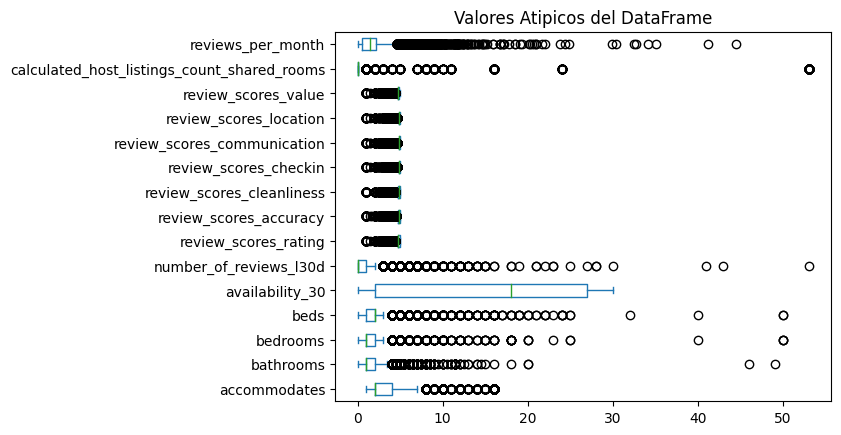

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe cuantitativo A
fig = plt.figure(figsize = (15,8))
cuantitativas_A.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show()

<Figure size 1500x800 with 0 Axes>

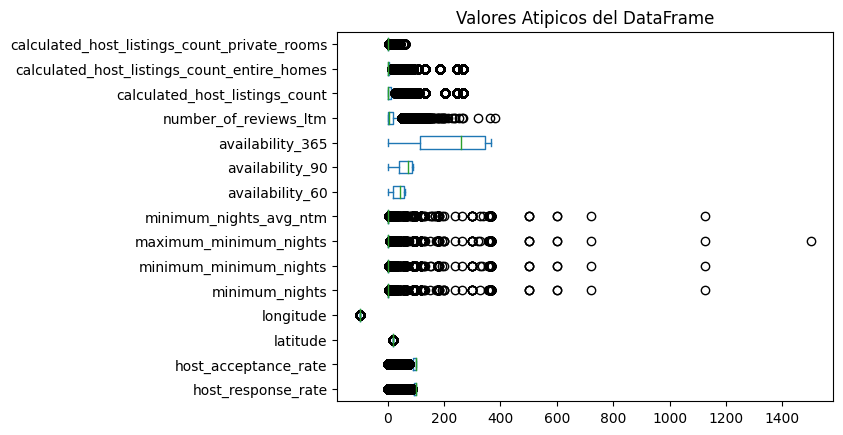

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe cuantitativo B
fig = plt.figure(figsize = (15,8))
cuantitativas_B.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show()

<Figure size 1500x800 with 0 Axes>

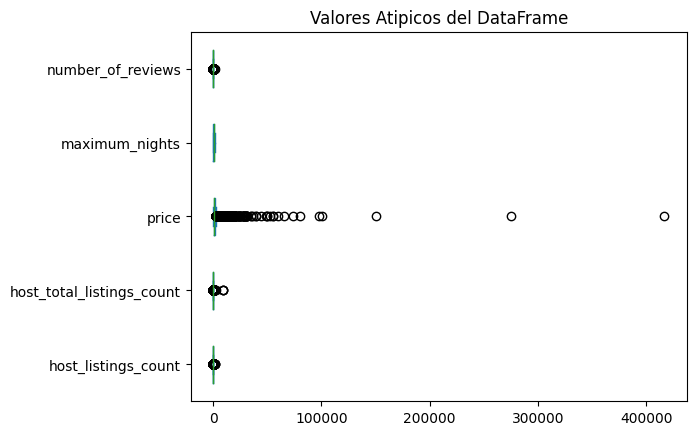

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe cuantitativo C
fig = plt.figure(figsize = (15,8))
cuantitativas_C.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show()

<Figure size 1500x800 with 0 Axes>

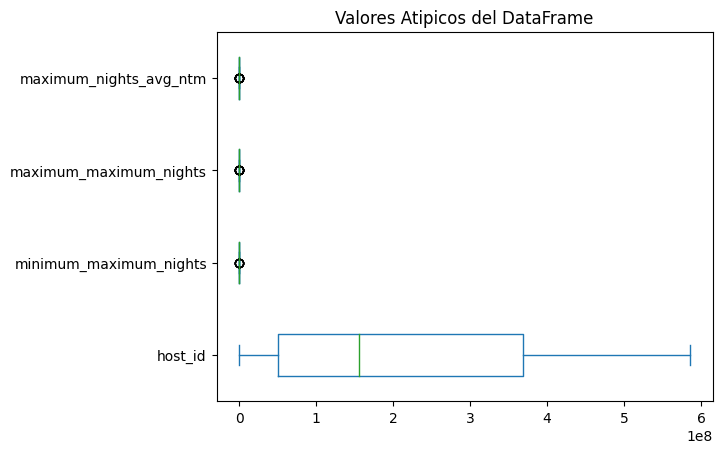

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe cuantitativo D
fig = plt.figure(figsize = (15,8))
cuantitativas_D.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show()

In [ ]:
#Metodo aplicando Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = cuantitativas_A

percentile25 = y.quantile(0.25)
percentile75 = y.quantile(0.75)
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite superior permitido:\n',Limite_Superior_iqr)
print()
print('Limite inferior permitido:\n',Limite_Inferior_iqr)

Limite superior permitido:
 accommodates                                    7.000
bathrooms                                       3.500
bedrooms                                        3.500
beds                                            3.500
availability_30                                64.500
number_of_reviews_l30d                          2.500
review_scores_rating                            5.255
review_scores_accuracy                          5.215
review_scores_cleanliness                       5.265
review_scores_checkin                           5.225
review_scores_communication                     5.240
review_scores_location                          5.240
review_scores_value                             5.200
calculated_host_listings_count_shared_rooms     0.000
reviews_per_month                               4.570
dtype: float64

Limite inferior permitido:
 accommodates                                   -1.000
bathrooms                                      -0.500
bedrooms  

In [ ]:
#Obtenemos datos limpios del DataFrame
data2_A = cuantitativas_A[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data2_A.head()

,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,1.0,1.0,2.0,0,0.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,0.0,0.41
1,2.0,1.0,1.0,1.0,28,0.0,4.76,4.80,4.77,4.85,4.84,4.85,4.73,0.0,1.70
2,NaN,NaN,NaN,NaN,29,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.0,0.42
3,4.0,1.0,2.0,3.0,3,0.0,4.75,4.83,4.72,4.84,4.93,NaN,4.75,0.0,1.19
4,4.0,1.0,2.0,2.0,26,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.0,0.32


In [ ]:
#Corroboramos los valores nulos
valores_nulos = data2_A.isnull().sum()
valores_nulos

,0
accommodates,1328
bathrooms,641
bedrooms,848
beds,2353
availability_30,0
number_of_reviews_l30d,3227
review_scores_rating,1758
review_scores_accuracy,2224
review_scores_cleanliness,1896
review_scores_checkin,1989


In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del DataFrame
data_clean_A = data2_A.copy()
data_clean_A = data_clean_A.fillna(round(data2_A.mean(),2))

In [ ]:
#Metodo aplicando Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = cuantitativas_B

percentile25 = y.quantile(0.25)
percentile75 = y.quantile(0.75)
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite superior permitido:\n',Limite_Superior_iqr)
print()
print('Limite inferior permitido:\n',Limite_Inferior_iqr)

Limite superior permitido:
 host_response_rate                              107.500000
host_acceptance_rate                            113.500000
latitude                                         19.493626
longitude                                       -99.117560
minimum_nights                                    3.500000
minimum_minimum_nights                            3.500000
maximum_minimum_nights                            6.000000
minimum_nights_avg_ntm                            4.500000
availability_60                                 112.500000
availability_90                                 159.000000
availability_365                                688.500000
number_of_reviews_ltm                            50.000000
calculated_host_listings_count                   26.000000
calculated_host_listings_count_entire_homes      15.000000
calculated_host_listings_count_private_rooms      5.000000
dtype: float64

Limite inferior permitido:
 host_response_rate                         

In [ ]:
#Obtenemos datos limpios del DataFrame
data2_B = cuantitativas_B[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data2_B.head()

,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,100.0,88.0,19.42063,-99.16586,3.0,3.0,3.0,3.0,5,23,262,3.0,3.0,2.0,1.0
1,NaN,91.0,19.38283,NaN,1.0,1.0,1.0,1.0,58,88,363,0.0,1.0,1.0,0.0
2,100.0,92.0,19.41162,-99.17794,1.0,1.0,1.0,1.0,59,89,364,0.0,13.0,4.0,2.0
3,100.0,96.0,19.43956,-99.17263,2.0,2.0,2.0,2.0,22,26,236,6.0,1.0,1.0,0.0
4,89.0,NaN,19.41152,-99.16857,2.0,2.0,2.0,2.0,56,86,361,4.0,2.0,2.0,0.0


In [ ]:
#Corroboramos los valores nulos
valores_nulos = data2_B.isnull().sum()
valores_nulos

,0
host_response_rate,1990
host_acceptance_rate,3121
latitude,1773
longitude,2814
minimum_nights,3507
minimum_minimum_nights,3105
maximum_minimum_nights,1996
minimum_nights_avg_ntm,2758
availability_60,0
availability_90,0


In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
data_clean_B = data2_B.copy()
data_clean_B = data_clean_B.fillna(round(data2_B.mean(),2))

In [ ]:
#Metodo aplicando Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = cuantitativas_C

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite superior permitido:\n',Limite_Superior_iqr)
print()
print('Limite inferior permitido:\n',Limite_Inferior_iqr)

Limite superior permitido:
 host_listings_count            33.500
host_total_listings_count      39.500
price                        2712.925
maximum_nights               2527.500
number_of_reviews             128.000
dtype: float64

Limite inferior permitido:
 host_listings_count           -18.500
host_total_listings_count     -20.500
price                        -582.955
maximum_nights              -1212.500
number_of_reviews             -72.000
dtype: float64


In [ ]:
#Obtenemos datos limpios del DataFrame
data2_C = cuantitativas_C[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data2_C.head()

,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews
0,3.0,6.0,1652.0,48,56.0
1,1.0,1.0,NaN,7,0.0
2,17.0,17.0,NaN,365,64.0
3,1.0,4.0,814.0,1125,NaN
4,3.0,4.0,1923.0,30,49.0


In [ ]:
#Corroboramos los valores nulos
valores_nulos = data2_C.isnull().sum()
valores_nulos

,0
host_listings_count,3537
host_total_listings_count,3824
price,1999
maximum_nights,0
number_of_reviews,2381


In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
data_clean_C = data2_C.copy()
data_clean_C = data_clean_C.fillna(round(data2_C.mean(),2))

In [ ]:
#Metodo aplicando Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = cuantitativas_D

percentile25 = y.quantile(0.25)
percentile75 = y.quantile(0.75)
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Limite superior permitido:\n',Limite_Superior_iqr)
print()
print('Limite inferior permitido:\n',Limite_Inferior_iqr)

Limite superior permitido:
 host_id                   8.456103e+08
minimum_maximum_nights    2.265000e+03
maximum_maximum_nights    2.265000e+03
maximum_nights_avg_ntm    2.265000e+03
dtype: float64

Limite inferior permitido:
 host_id                  -4.267260e+08
minimum_maximum_nights   -7.750000e+02
maximum_maximum_nights   -7.750000e+02
maximum_nights_avg_ntm   -7.750000e+02
dtype: float64


In [ ]:
#Obtenemos datos limpios del DataFrame
data2_D = cuantitativas_D[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
data2_D.head()

,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,4796027,48.0,48.0,48.0
1,153786,7.0,7.0,7.0
2,196253,365.0,365.0,365.0
3,4647293,1125.0,1125.0,1125.0
4,334451,30.0,30.0,30.0


In [ ]:
#Corroboramos los valores nulos
valores_nulos = data2_D.isnull().sum()
valores_nulos

,0
host_id,0
minimum_maximum_nights,6
maximum_maximum_nights,10
maximum_nights_avg_ntm,10


In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
data_clean_D = data2_D.copy()
data_clean_D = data_clean_D.fillna(round(data2_D.mean(),2))

In [ ]:
#Unimos los dataframes cuantitativos limpios con el dataframe cualitativo
datos_limpios = pd.concat([cualitativas, data_clean_A, data_clean_B, data_clean_C, data_clean_D], axis=1)
datos_limpios.head()

,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,Marco,2013-01-21,"Mexico City, Mexico",within an hour,t,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,"[""40 inch HDTV with Amazon Prime Video, Netfli...",t,2024-06-28,2013-03-30,2024-04-17,f,2.00,1.00,1.00,2.00,0,0.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,0.0,0.41,100.00,88.0,19.42063,-99.16586,3.0,3.0,3.0,3.0,5,23,262,3.0,3.0,2.0,1.0,3.0,6.0,1652.00,48,56.00,4796027,48.0,48.0,48.0
1,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,2010-06-28,"Mexico City, Mexico",a few days or more,f,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,Entire villa,Entire home/apt,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",t,2024-06-27,2030-12-31,2030-12-31,f,2.00,1.00,1.00,1.00,28,0.0,4.76,4.80,4.77,4.85,4.84,4.85,4.73,0.0,1.70,98.44,91.0,19.38283,-99.17000,1.0,1.0,1.0,1.0,58,88,363,0.0,1.0,1.0,0.0,1.0,1.0,1086.68,7,0.00,153786,7.0,7.0,7.0
2,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,t,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,Entire home,Entire home/apt,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",t,2024-06-28,2011-11-09,2023-03-26,f,2.95,1.32,1.45,1.55,29,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.0,0.42,100.00,92.0,19.41162,-99.17794,1.0,1.0,1.0,1.0,59,89,364,0.0,13.0,4.0,2.0,17.0,17.0,1086.68,365,64.00,196253,365.0,365.0,365.0
3,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,No description available,Martina,2013-01-09,"Mexico City, Mexico",within an hour,t,"['email', 'phone']",t,t,Miguel Hidalgo,Entire serviced apartment,Entire home/apt,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",t,2024-06-28,2013-05-16,2024-05-21,t,4.00,1.00,2.00,3.00,3,0.0,4.75,4.83,4.72,4.84,4.93,4.90,4.75,0.0,1.19,100.00,96.0,19.43956,-99.17263,2.0,2.0,2.0,2.0,22,26,236,6.0,1.0,1.0,0.0,1.0,4.0,814.00,1125,25.25,4647293,1125.0,1125.0,1125.0
4,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,2011-01-04,"Mexico City, Mexico",within a day,t,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",t,2024-06-28,2011-11-17,2024-05-05,f,4.00,1.00,2.00,2.00,26,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.0,0.32,89.00,96.9,19.41152,-99.16857,2.0,2.0,2.0,2.0,56,86,361,4.0,2.0,2.0,0.0,3.0,4.0,1923.00,30,49.00,334451,30.0,30.0,30.0


In [ ]:
valores_nulos = datos_limpios.isnull().sum()
valores_nulos

,0
last_scraped,0
source,0
name,0
description,0
host_name,0
host_since,0
host_location,0
host_response_time,0
host_is_superhost,0
host_verifications,0


In [ ]:
datos_limpios.head()

,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,Marco,2013-01-21,"Mexico City, Mexico",within an hour,t,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,"[""40 inch HDTV with Amazon Prime Video, Netfli...",t,2024-06-28,2013-03-30,2024-04-17,f,2.00,1.00,1.00,2.00,0,0.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,0.0,0.41,100.00,88.0,19.42063,-99.16586,3.0,3.0,3.0,3.0,5,23,262,3.0,3.0,2.0,1.0,3.0,6.0,1652.00,48,56.00,4796027,48.0,48.0,48.0
1,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,2010-06-28,"Mexico City, Mexico",a few days or more,f,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,Entire villa,Entire home/apt,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",t,2024-06-27,2030-12-31,2030-12-31,f,2.00,1.00,1.00,1.00,28,0.0,4.76,4.80,4.77,4.85,4.84,4.85,4.73,0.0,1.70,98.44,91.0,19.38283,-99.17000,1.0,1.0,1.0,1.0,58,88,363,0.0,1.0,1.0,0.0,1.0,1.0,1086.68,7,0.00,153786,7.0,7.0,7.0
2,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,t,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,Entire home,Entire home/apt,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",t,2024-06-28,2011-11-09,2023-03-26,f,2.95,1.32,1.45,1.55,29,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.0,0.42,100.00,92.0,19.41162,-99.17794,1.0,1.0,1.0,1.0,59,89,364,0.0,13.0,4.0,2.0,17.0,17.0,1086.68,365,64.00,196253,365.0,365.0,365.0
3,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,No description available,Martina,2013-01-09,"Mexico City, Mexico",within an hour,t,"['email', 'phone']",t,t,Miguel Hidalgo,Entire serviced apartment,Entire home/apt,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",t,2024-06-28,2013-05-16,2024-05-21,t,4.00,1.00,2.00,3.00,3,0.0,4.75,4.83,4.72,4.84,4.93,4.90,4.75,0.0,1.19,100.00,96.0,19.43956,-99.17263,2.0,2.0,2.0,2.0,22,26,236,6.0,1.0,1.0,0.0,1.0,4.0,814.00,1125,25.25,4647293,1125.0,1125.0,1125.0
4,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,2011-01-04,"Mexico City, Mexico",within a day,t,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",t,2024-06-28,2011-11-17,2024-05-05,f,4.00,1.00,2.00,2.00,26,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.0,0.32,89.00,96.9,19.41152,-99.16857,2.0,2.0,2.0,2.0,56,86,361,4.0,2.0,2.0,0.0,3.0,4.0,1923.00,30,49.00,334451,30.0,30.0,30.0


## Generar Archivo Final

In [ ]:
#Convertir DataFrame a csv
datos_limpios.to_csv('Mexico_listings_clean.csv')

In [ ]:
#Descargar archivo filtrado en csv
from google.colab import files

files.download('Mexico_listings_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>